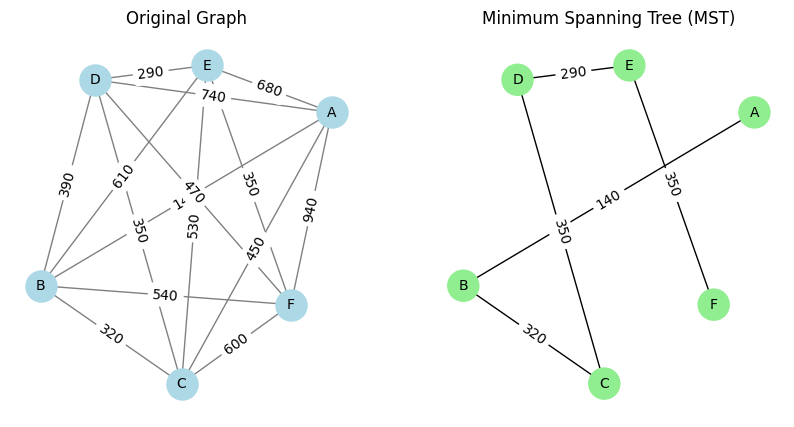

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def kruskal(adj_matrix):
   def find(parents, vertex):
      if parents[vertex] == vertex:
         return vertex
      return find(parents, parents[vertex])

   def union(parents, rank, v1, v2):
      root_v1 = find(parents, v1)
      root_v2 = find(parents, v2)
      if rank[root_v1] < rank[root_v2]:
         parents[root_v1] = root_v2
      elif rank[root_v1] > rank[root_v2]:
         parents[root_v2] = root_v1
      else:
         parents[root_v2] = root_v1
         rank[root_v1] += 1

   edges = []
   num_vertices = len(adj_matrix)
   for i in range(num_vertices):
      for j in range(i + 1, num_vertices):
         if adj_matrix[i][j] != 0:
            edges.append((adj_matrix[i][j], i, j))

   edges = sorted(edges)

   parents = [i for i in range(num_vertices)]
   rank = [0] * num_vertices

   mst = []
   for edge in edges:
      weight, v1, v2 = edge
      root_v1 = find(parents, v1)
      root_v2 = find(parents, v2)
      if root_v1 != root_v2:
         mst.append(edge)
         union(parents, rank, root_v1, root_v2)

   return mst

def draw_graphs(adj_matrix, mst):
   vertex_labels = {i: chr(65 + i) for i in range(len(adj_matrix))}

   G_original = nx.Graph()
   G_mst = nx.Graph()

   num_vertices = len(adj_matrix)
   for i in range(num_vertices):
      for j in range(i + 1, num_vertices):
         if adj_matrix[i][j] != 0:
            G_original.add_edge(vertex_labels[i], vertex_labels[j], weight=adj_matrix[i][j])

   for edge in mst:
      weight, v1, v2 = edge
      G_mst.add_edge(vertex_labels[v1], vertex_labels[v2], weight=weight)

   pos = nx.spring_layout(G_original, seed=6)

   plt.figure(figsize=(10, 5))
   plt.subplot(121)
   nx.draw(G_original, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
   labels = nx.get_edge_attributes(G_original, 'weight')
   nx.draw_networkx_edge_labels(G_original, pos, edge_labels=labels)
   plt.title("Original Graph")

   plt.subplot(122)
   node_colors = ['lightgreen'] * num_vertices
   nx.draw(G_mst, pos, with_labels=True, node_color=node_colors, edge_color='black', node_size=500, font_size=10)
   labels_mst = nx.get_edge_attributes(G_mst, 'weight')
   nx.draw_networkx_edge_labels(G_mst, pos, edge_labels=labels_mst)
   plt.title("Minimum Spanning Tree (MST)")
   plt.show()

adj_matrix = [
    [0, 140, 450, 740, 680, 940],
    [140, 0, 320, 390, 610, 540],
    [450, 320, 0, 350, 530, 600],
    [740, 390, 350, 0, 290, 470],
    [680, 610, 530, 290, 0, 350],
    [940, 540, 600, 470, 350, 0],
]

mst = kruskal(adj_matrix)
draw_graphs(adj_matrix, mst)
